In [6]:
import requests

market = "BTCUSDT"
tick_interval = "1h"

url = f"https://api.binance.com/api/v3/klines?symbol={market}&interval={tick_interval}"
data = requests.get(url).json()


In [7]:
from binance.client import Client
import pandas as pd

client = Client()
candles = client.get_klines(symbol="BTCUSDT", interval=Client.KLINE_INTERVAL_30MINUTE)

cd = pd.DataFrame(candles, columns=[
    "Date",
    "Open",
    "High",
    "Low",
    "Close",
    "Volume",
    "Close time",
    "Quote asset volume",
    "Number of trades",
    "Taker buy base asset volume",
    "Taker buy quote asset volume",
    "Can be ignored",
], dtype=float)

for i in cd.index:
    cd.at[i, "Date"] = datetime.fromtimestamp(cd.at[i, "Date"] / 1000)

cd.index = pd.DatetimeIndex(cd["Date"])
cd.head(3)


,Date,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Can be ignored
Date,,,,,,,,,,,,
2022-04-23 04:30:00,2022-04-23 04:30:00,39520.01,39554.97,39429.31,39495.49,277.46530,1.650683e+12,1.095927e+07,17756.0,126.06871,4.979045e+06,0.0
2022-04-23 05:00:00,2022-04-23 05:00:00,39495.48,39553.01,39449.19,39461.08,426.32483,1.650685e+12,1.683826e+07,18303.0,235.96231,9.319559e+06,0.0
2022-04-23 05:30:00,2022-04-23 05:30:00,39461.07,39528.47,39406.25,39463.02,391.39169,1.650686e+12,1.544501e+07,18517.0,182.56447,7.204311e+06,0.0


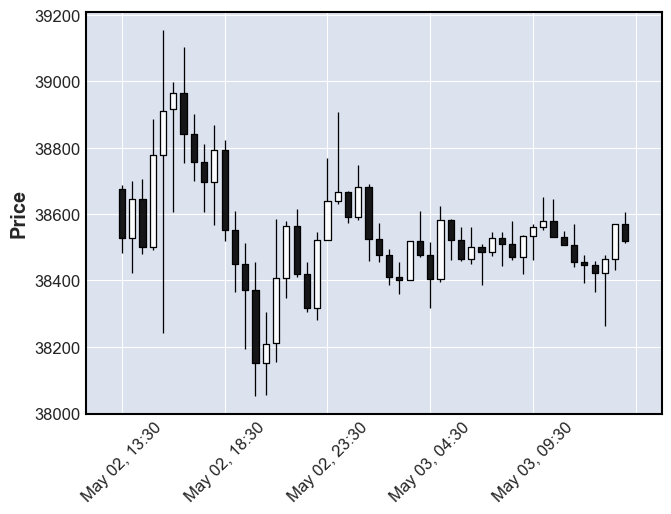

In [8]:
import mplfinance as mpf
from datetime import datetime

chart_data = cd[["Date", "Open", "High", "Low", "Close", "Volume"]]

mpf.plot(chart_data.tail(50), type="candle")
